# Midterm Clustering Challenge

## What To Do

Based on the case presentation, you are asked to,

1. Select 5 license plate images for each group member from the dataset provided.
2. Segment the number plate image to clarify the characters on the number plate.
3. You can use the K-Means algorithm as explained in the previous practicum or use another clustering algorithm.
4. You are allowed to carry out data preprocessing on the image such as,
    - Change the color space
    - Dimensional reduction
    - etc
5. Show image comparison between before and after segmentation

**Open Challenge**
 - How to evaluate segmentation results?
 - Apply to this case!


**Notes:**
1. The image loading process is exemplified using the OpenCV library
2. By default, openCV will load images in BGR format

## Library

In [26]:
import pandas as pd
import cv2 as cv
import numpy as np
from sklearn.metrics import f1_score
from scipy.stats import entropy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow

## Method

In [15]:
def plot_image(data):
    """
    Plot five images in one figure.

    Args:
        data (list): A list of numpy arrays representing images.

    Returns:
        None
    """
    fig, ax = plt.subplots(1, 5, figsize=(10, 10))

    for i in range(len(data)):
        ax[i].imshow(data[i])
        ax[i].axis('off')

    plt.show()

def preprocessing(img, typeby):
    """
    Perform preprocessing steps on an image.

    Args:
        img (numpy array): An image to be preprocessed.
        typeby (str): The type of preprocessing to be applied.

    Returns:
        numpy array: The preprocessed image.
    """
    preprocessed_img = img

    if typeby == 'grayscale':
        preprocessed_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    elif typeby == 'binary':
        gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        _, preprocessed_img = cv.threshold(gray_img, 127, 255, cv.THRESH_BINARY)
    elif typeby == 'blur':
        preprocessed_img = cv.GaussianBlur(img, (5, 5), 0)

    return preprocessed_img

def segment_image(img, n_clusters):
    """
    Segment an image using K-Means algorithm.

    Args:
        img (numpy array): An image to be segmented.
        n_clusters (int): The number of clusters to be used.

    Returns:
        numpy array: The segmented image.
    """
    img_reshaped = img.reshape(-1, 3)

    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(img_reshaped)

    labels = kmeans.labels_

    labels_reshaped = labels.reshape(img.shape[0], img.shape[1])

    return labels_reshaped

def compare_images(img1, img2):
    """
    Compare two images in one figure.

    Args:
        img1 (numpy array): The first image to be compared.
        img2 (numpy array): The second image to be compared.

    Returns:
        None
    """
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img1)
    ax[0].axis('off')
    ax[1].imshow(img2)
    ax[1].axis('off')

    plt.show()

## Preprocessing

### Plot 5 Image

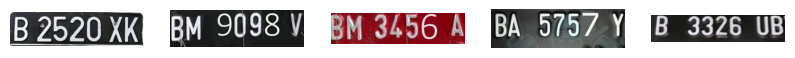

In [30]:
data = []

for i in range(1, 6):
  img = cv.imread('gambar-' + str(i) + '.jpg', cv.IMREAD_COLOR)
  img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  data.append(img_rgb)

plot_image(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


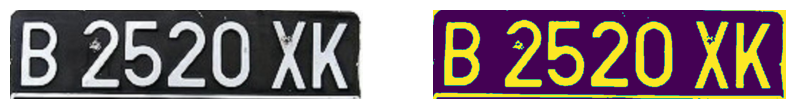

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


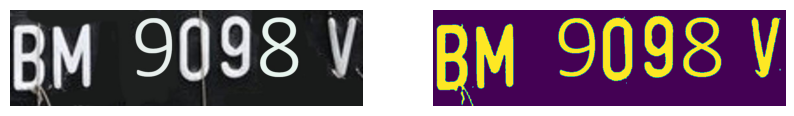

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


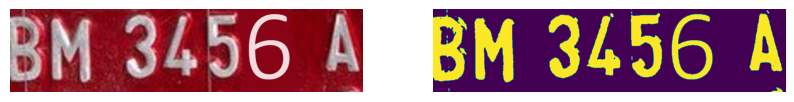

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


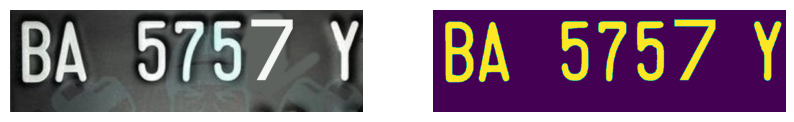

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


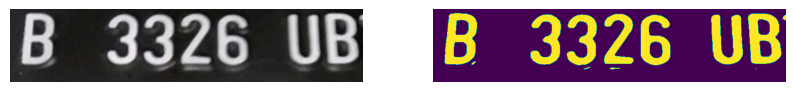

In [24]:
data_segmented = []

for i in data:
  preprocessed_img = preprocessing(i, 'grayscale')
  img_segmented = segment_image(i, 2)
  data_segmented.append(img_segmented)
  compare_images(i, img_segmented)

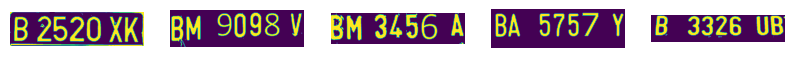

In [25]:
plot_image(data_segmented)

## Evaluation

In [35]:
evaluation = []

for i in range(1, 6):
  gt = cv.imread('gambar-' + str(i) + '.jpg', cv.IMREAD_GRAYSCALE)
  gt_binary = np.where(gt > 0, 1, 0)

  segmented_img = data_segmented[i-1]
  gt_8bit = np.uint8(gt_binary * 255)

  gt_resized = cv.resize(gt_8bit, (segmented_img.shape[1], segmented_img.shape[0]))
  f_measure = f1_score(gt_resized.flatten(), segmented_img.flatten(), average='micro')

  ent = entropy(segmented_img.flatten())
  evaluation.append((f_measure, ent))

print('Evaluation results:')
print('Image\tF-measure\tEntropy')
for i in range(5):
  print(f'{i+1}\t{evaluation[i][0]:.2f}\t\t{evaluation[i][1]:.2f}')

Evaluation results:
Image	F-measure	Entropy
1	0.00		11.20
2	0.00		11.16
3	0.00		11.25
4	0.00		11.03
5	0.00		10.33
